In [93]:
!pip install pandas matplotlib scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [94]:
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Scikit-learn version:", sklearn.__version__)

NumPy version: 2.0.2
Pandas version: 2.2.2
Scikit-learn version: 1.6.1


In [95]:
from google.colab import drive

drive.mount('/content/drive')

# --- Load and subset ---
aqi_file = '/content/drive/MyDrive/Project S.A.Vitr/DATA/Cleaned Data/aqi_test_model.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
ds_aqi = pd.read_csv(aqi_file)

In [97]:
df = pd.read_csv(aqi_file, parse_dates=['Date'])
ds_aqi = ds_aqi.set_index('Date')

In [98]:
print("\n--- Missing Value Count per Column ---")
print(ds_aqi.isnull().sum())


--- Missing Value Count per Column ---
PM10             9
PM2.5            9
SO2              9
NOx              9
CO               9
Ozone            9
NH3              9
AT_celsius       9
RH_percentage    9
WS_mpersec       9
WD_deg           9
RF_mm            9
TOTRF_mm         0
SR_wpermsq       9
dtype: int64


In [99]:
print("Starting forward-fill imputation...")
ds_aqi = ds_aqi.ffill()

Starting forward-fill imputation...


In [100]:
print("\n--- Missing Value Count after Imputation ---")
print(ds_aqi.isnull().sum().sum())


--- Missing Value Count after Imputation ---
0


In [101]:
display(ds_aqi.head())

,PM10,PM2.5,SO2,NOx,CO,Ozone,NH3,AT_celsius,RH_percentage,WS_mpersec,WD_deg,RF_mm,TOTRF_mm,SR_wpermsq
Date,,,,,,,,,,,,,,
2024-01-01,156.84,87.67,2.66,38.55,0.86,69.02,18.67,22.68,61.71,0.30,185.73,0.0,0.0,92.73
2024-01-02,142.31,67.93,2.58,30.89,0.70,51.91,14.79,22.96,63.30,0.28,178.93,0.0,0.0,85.79
2024-01-03,175.14,97.59,8.28,25.58,0.77,64.98,13.88,23.36,65.43,0.29,202.49,0.0,0.0,70.50
2024-01-04,170.87,91.68,8.11,37.17,0.77,54.66,19.39,22.74,65.25,0.29,202.98,0.0,0.0,50.13
2024-01-05,137.39,69.88,6.70,35.68,0.68,66.40,20.50,22.50,59.86,0.30,207.00,0.0,0.0,57.07


In [102]:
display(ds_aqi.info())

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 2024-01-01 to 2024-12-31
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PM10           366 non-null    float64
 1   PM2.5          366 non-null    float64
 2   SO2            366 non-null    float64
 3   NOx            366 non-null    float64
 4   CO             366 non-null    float64
 5   Ozone          366 non-null    float64
 6   NH3            366 non-null    float64
 7   AT_celsius     366 non-null    float64
 8   RH_percentage  366 non-null    float64
 9   WS_mpersec     366 non-null    float64
 10  WD_deg         366 non-null    float64
 11  RF_mm          366 non-null    float64
 12  TOTRF_mm       366 non-null    float64
 13  SR_wpermsq     366 non-null    float64
dtypes: float64(14)
memory usage: 42.9+ KB


None

In [103]:
display(ds_aqi.describe())

,PM10,PM2.5,SO2,NOx,CO,Ozone,NH3,AT_celsius,RH_percentage,WS_mpersec,WD_deg,RF_mm,TOTRF_mm,SR_wpermsq
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,91.522705,41.213087,4.967295,24.580055,0.646749,48.938934,12.685000,25.857568,63.292022,0.401721,203.265246,0.030328,0.029863,95.709727
std,45.551941,28.134497,3.106607,20.890460,0.444327,27.910744,7.873569,2.639594,12.945284,0.100156,29.640130,0.122131,0.121402,38.344451
min,13.790000,2.920000,0.600000,1.550000,0.180000,8.140000,1.440000,19.580000,31.650000,0.190000,122.430000,0.000000,0.000000,0.000000
25%,52.095000,19.232500,3.087500,12.420000,0.320000,22.682500,7.712500,24.292500,53.837500,0.330000,178.535000,0.000000,0.000000,71.282500
50%,87.530000,38.090000,3.975000,17.300000,0.510000,46.575000,11.155000,25.775000,65.795000,0.390000,205.350000,0.000000,0.000000,96.455000
75%,124.047500,54.445000,5.635000,30.115000,0.777500,72.540000,15.655000,27.060000,74.035000,0.460000,224.737500,0.010000,0.010000,118.362500
max,317.920000,263.380000,17.330000,176.850000,2.410000,129.750000,62.710000,34.350000,84.400000,0.740000,285.020000,1.410000,1.410000,208.910000


In [104]:
X = ds_aqi[['RH_percentage']]
Y = ds_aqi['PM2.5']

In [105]:
from sklearn.model_selection import train_test_split

# We use an 80/20 split (80% for training, 20% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} days")
print(f"Testing set size: {len(X_test)} days")

Training set size: 292 days
Testing set size: 74 days


In [106]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
slr_model = LinearRegression()
slr_model.fit(X_train, Y_train)

print("\nSLR Model Training Complete.")


SLR Model Training Complete.


In [107]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
Y_pred = slr_model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f"\n--- Simple Linear Regression (PM2.5) Evaluation ---")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")


--- Simple Linear Regression (PM2.5) Evaluation ---
Root Mean Squared Error (RMSE): 21.44
R-squared (R2) Score: 0.1594


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
# Assuming ds_aqi is your clean DataFrame with only Pollutants and Weather features

# Get the list of all feature columns present in your clean DataFrame
feature_cols = ds_aqi.columns.tolist()

results = []

# Iterate through all columns as the TARGET (Y)
for y_col in feature_cols:
    # Iterate through all OTHER columns as the PREDICTOR (X)
    for x_col in feature_cols:
        if x_col == y_col:
            continue # Skip when X is the same as Y

        # Define X (Predictor) and Y (Target)
        # Note: X needs to be a DataFrame (hence the double brackets [[x_col]])
        X = ds_aqi[[x_col]]
        Y = ds_aqi[y_col]

        # 1. Train-Test Split (use a fixed random_state for reproducibility)
        # Stratifying by time is not necessary for this univariate analysis, so standard split is fine.
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

        # 2. Train SLR Model
        model = LinearRegression()
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        # 3. Calculate Metrics and Coefficients
        rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
        r2 = r2_score(Y_test, Y_pred)
        coef = model.coef_[0]
        intercept = model.intercept_

        # 4. Store Results
        results.append({
            'Target (Y)': y_col,
            'Predictor (X)': x_col,
            'R2 Score': round(r2, 4),
            'RMSE': round(rmse, 2),
            'Coefficient (Slope)': round(coef, 4),
            'Intercept': round(intercept, 2)
        })

# Convert results list to a DataFrame for easy viewing and saving
results_df = pd.DataFrame(results)

# Display the top 10 strongest linear relationships
print("\n--- Top 10 Strongest Univariate Linear Relationships (SLR) ---")
display(results_df.sort_values(by='R2 Score', ascending=False).head(10))

# Uncomment to save the full table for review
# results_df.to_csv('slr_combination_analysis.csv', index=False)


--- Top 10 Strongest Univariate Linear Relationships (SLR) ---


,Target (Y),Predictor (X),R2 Score,RMSE,Coefficient (Slope),Intercept
167,TOTRF_mm,RF_mm,0.9999,0.00,0.9932,-0.00
154,RF_mm,TOTRF_mm,0.9999,0.00,1.0059,0.00
109,RH_percentage,Ozone,0.7254,7.16,-0.3844,82.19
72,Ozone,RH_percentage,0.7238,15.61,-1.7768,161.16
0,PM10,PM2.5,0.7220,24.08,1.4191,32.48
13,PM2.5,PM10,0.6619,13.60,0.5861,-12.18
177,SR_wpermsq,RH_percentage,0.5998,25.81,-2.2276,236.64
116,RH_percentage,SR_wpermsq,0.5935,8.70,-0.2543,87.86
174,SR_wpermsq,Ozone,0.4381,30.59,0.8900,51.94
77,Ozone,SR_wpermsq,0.4278,22.47,0.4695,3.37


In [109]:
# Drop the redundant columns identified by the R2 score of 1.0
ds_aqi = ds_aqi.drop(columns=['TOTRF_mm'])
print("Redundant column 'TOTRF_mm' has been dropped.")

Redundant column 'TOTRF_mm' has been dropped.


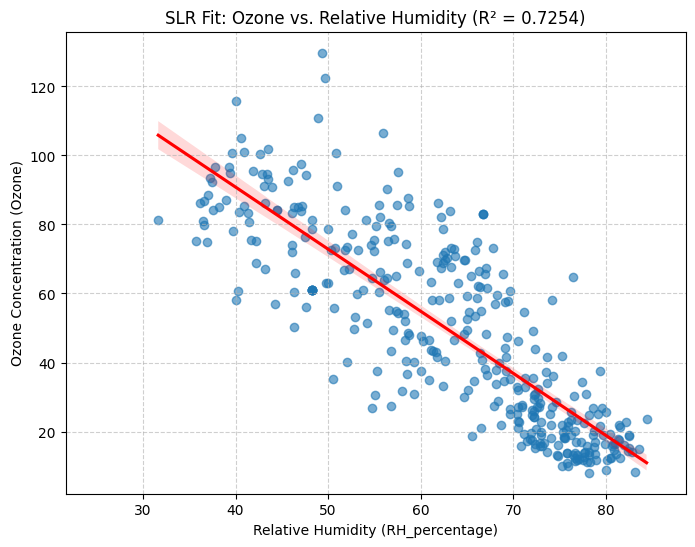

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Ozone vs. RH with the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='RH_percentage', y='Ozone', data=ds_aqi,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title(f'SLR Fit: Ozone vs. Relative Humidity (R² = 0.7254)')
plt.xlabel('Relative Humidity (RH_percentage)')
plt.ylabel('Ozone Concentration (Ozone)')
plt.grid(True, linestyle='--', alpha=0.6)

# Set the x-axis to start from zero
plt.xlim(ds_aqi['RH_percentage'].min() - 10, ds_aqi['RH_percentage'].max() * 1.05)

plt.show()

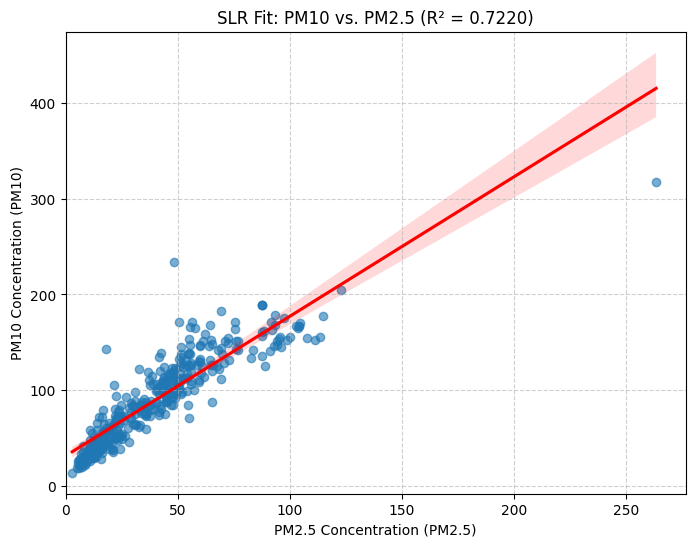

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find the R2 score for PM10 vs PM2.5 from results_df
r2_score_pm10_pm25 = results_df[(results_df['Target (Y)'] == 'PM10') & (results_df['Predictor (X)'] == 'PM2.5')]['R2 Score'].iloc[0]


# Plot PM10 vs. PM2.5 with the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='PM2.5', y='PM10', data=ds_aqi,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title(f'SLR Fit: PM10 vs. PM2.5 (R² = {r2_score_pm10_pm25:.4f})')
plt.xlabel('PM2.5 Concentration (PM2.5)')
plt.ylabel('PM10 Concentration (PM10)')
plt.grid(True, linestyle='--', alpha=0.6)

# Set the x-axis to start from zero
plt.xlim(0, ds_aqi['PM2.5'].max() * 1.05)

plt.show()

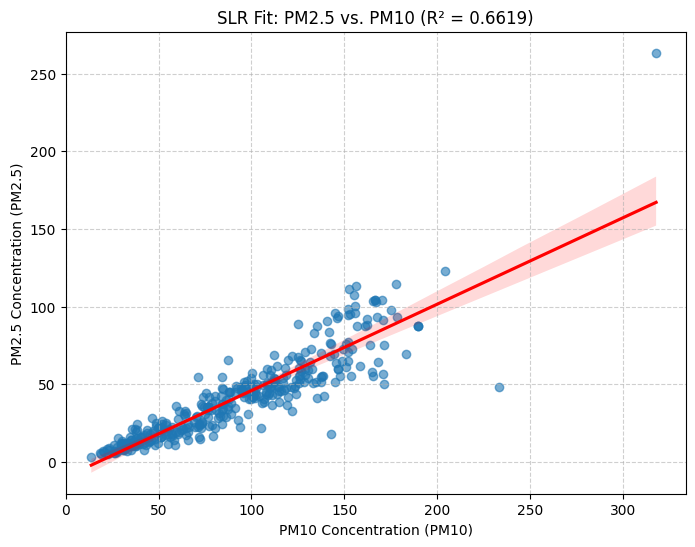

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find the R2 score for PM2.5 vs PM10 from results_df
r2_score_pm25_pm10 = results_df[(results_df['Target (Y)'] == 'PM2.5') & (results_df['Predictor (X)'] == 'PM10')]['R2 Score'].iloc[0]


# Plot PM2.5 vs. PM10 with the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='PM10', y='PM2.5', data=ds_aqi,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title(f'SLR Fit: PM2.5 vs. PM10 (R² = {r2_score_pm25_pm10:.4f})')
plt.xlabel('PM10 Concentration (PM10)')
plt.ylabel('PM2.5 Concentration (PM2.5)')
plt.grid(True, linestyle='--', alpha=0.6)

# Set the x-axis to start from zero
plt.xlim(0, ds_aqi['PM10'].max() * 1.05)


plt.show()


--- SLR Evaluation: PM2.5 vs. WS_mpersec ---
R-squared (R2) Score: 0.0155
Root Mean Squared Error (RMSE): 23.20
Coefficient (Slope): 40.6242
Intercept: 24.38


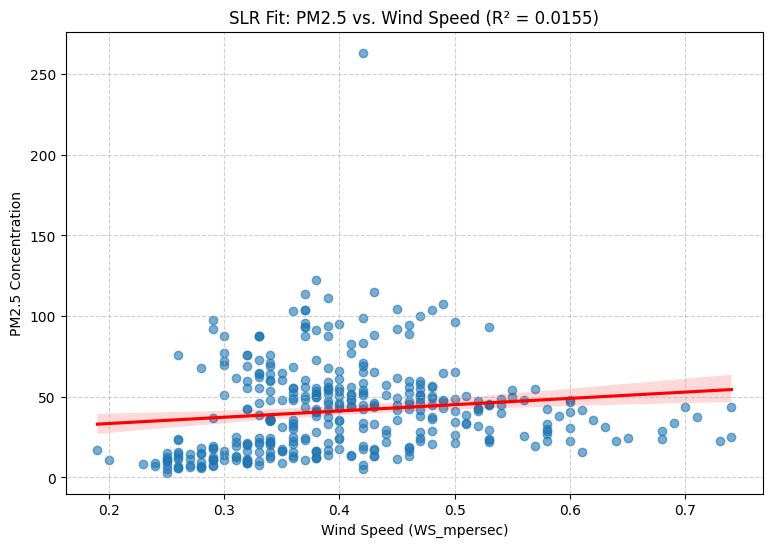

In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your clean DataFrame is named 'ds_aqi'

# --- 1. Define X (Predictor) and Y (Target) ---
# We are predicting PM2.5 using WS_mpersec
X = ds_aqi[['WS_mpersec']]
Y = ds_aqi['PM2.5']

# --- 2. Train-Test Split ---
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# --- 3. Train SLR Model ---
slr_model = LinearRegression()
slr_model.fit(X_train, Y_train)
Y_pred = slr_model.predict(X_test)

# --- 4. Evaluate ---
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)
coef = slr_model.coef_[0]
intercept = slr_model.intercept_

print(f"\n--- SLR Evaluation: PM2.5 vs. WS_mpersec ---")
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Coefficient (Slope): {coef:.4f}")
print(f"Intercept: {intercept:.2f}")

# --- 5. Visualization ---
plt.figure(figsize=(9, 6))
# We use regplot to automatically calculate and plot the linear regression line and its confidence interval
sns.regplot(x='WS_mpersec', y='PM2.5', data=ds_aqi,
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title(f'SLR Fit: PM2.5 vs. Wind Speed (R² = {r2:.4f})')
plt.xlabel('Wind Speed (WS_mpersec)')
plt.ylabel('PM2.5 Concentration')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [114]:
# Assuming 'ds_aqi' is your current DataFrame
# Removed 'pred' and 'TOTRF_mm' as they are not in the DataFrame or were already dropped
# ds_aqi = ds_aqi.drop(columns=['pred', 'TOTRF_mm'])
print("No redundant columns to drop at this stage.")

No redundant columns to drop at this stage.


In [115]:
# Define the Target (Y) and all Predictors (X)
target_col = 'PM2.5'
predictor_cols = ds_aqi.columns.drop(target_col)

X = ds_aqi[predictor_cols]
Y = ds_aqi[target_col]

print(f"MLR Target: {target_col}")
print(f"MLR Predictors: {predictor_cols.tolist()}")

MLR Target: PM2.5
MLR Predictors: ['PM10', 'SO2', 'NOx', 'CO', 'Ozone', 'NH3', 'AT_celsius', 'RH_percentage', 'WS_mpersec', 'WD_deg', 'RF_mm', 'SR_wpermsq']


In [116]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} days")
print(f"Testing set size: {len(X_test)} days")

Training set size: 292 days
Testing set size: 74 days


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)
Y_pred = mlr_model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f"\n--- Multiple Linear Regression (MLR) Evaluation ---")
print(f"Target: PM2.5")
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


--- Multiple Linear Regression (MLR) Evaluation ---
Target: PM2.5
R-squared (R2) Score: 0.6784
Root Mean Squared Error (RMSE): 13.26


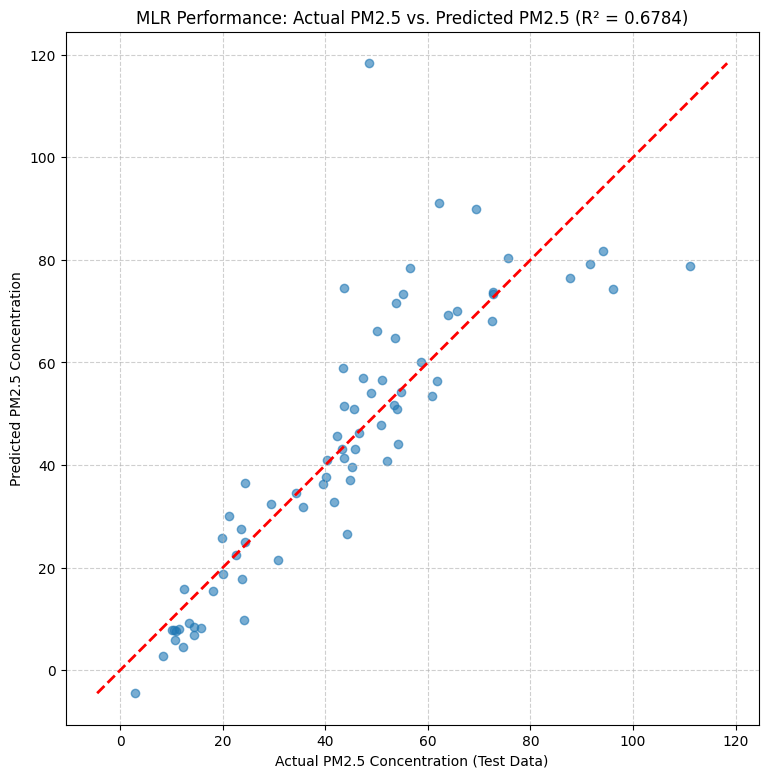

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Use the R2 score from your MLR evaluation
r2 = 0.6784

plt.figure(figsize=(9, 9))

# 1. Scatter Plot of Actual vs. Predicted
# Note: Assuming Y_test and Y_pred are available from your last MLR run
plt.scatter(Y_test, Y_pred, alpha=0.6)

# 2. Add the perfect prediction line (y=x)
# We find the min/max values to ensure the line covers the full range of data
min_val = min(Y_test.min(), Y_pred.min())
max_val = max(Y_test.max(), Y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2) # Red dashed line

plt.title(f'MLR Performance: Actual PM2.5 vs. Predicted PM2.5 (R² = {r2:.4f})')
plt.xlabel('Actual PM2.5 Concentration (Test Data)')
plt.ylabel('Predicted PM2.5 Concentration')
plt.grid(True, linestyle='--', alpha=0.6)
# Ensure the plot is square for a true visual assessment
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [119]:
# Define the Target (Y) and all Predictors (X)
target_col = 'PM10'
predictor_cols = ds_aqi.columns.drop(target_col)

X = ds_aqi[predictor_cols]
Y = ds_aqi[target_col]

print(f"MLR Target: {target_col}")
print(f"MLR Predictors: {predictor_cols.tolist()}")

MLR Target: PM10
MLR Predictors: ['PM2.5', 'SO2', 'NOx', 'CO', 'Ozone', 'NH3', 'AT_celsius', 'RH_percentage', 'WS_mpersec', 'WD_deg', 'RF_mm', 'SR_wpermsq']


In [120]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)} days")
print(f"Testing set size: {len(X_test)} days")

Training set size: 292 days
Testing set size: 74 days


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)
Y_pred = mlr_model.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f"\n--- Multiple Linear Regression (MLR) Evaluation ---")
print(f"Target: PM10")
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


--- Multiple Linear Regression (MLR) Evaluation ---
Target: PM10
R-squared (R2) Score: 0.7458
Root Mean Squared Error (RMSE): 23.03


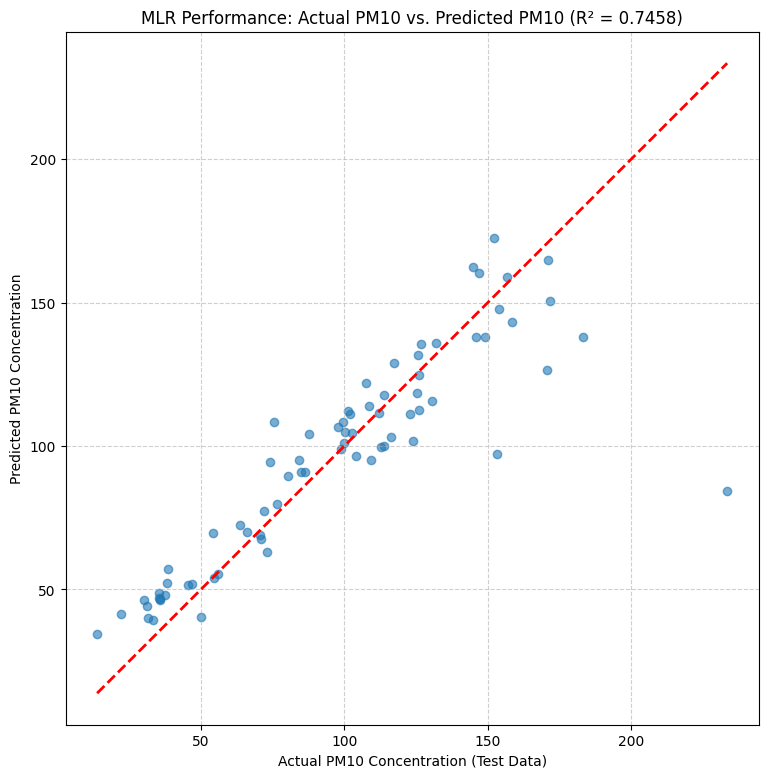

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Use the R2 score from your MLR evaluation for PM10
r2 = 0.7458 # R2 score from the MLR model predicting PM10

plt.figure(figsize=(9, 9))

# 1. Scatter Plot of Actual vs. Predicted
# Note: Assuming Y_test and Y_pred are available from your last MLR run (predicting PM10)
plt.scatter(Y_test, Y_pred, alpha=0.6)

# 2. Add the perfect prediction line (y=x)
# We find the min/max values to ensure the line covers the full range of data
min_val = min(Y_test.min(), Y_pred.min())
max_val = max(Y_test.max(), Y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2) # Red dashed line

plt.title(f'MLR Performance: Actual PM10 vs. Predicted PM10 (R² = {r2:.4f})')
plt.xlabel('Actual PM10 Concentration (Test Data)')
plt.ylabel('Predicted PM10 Concentration')
plt.grid(True, linestyle='--', alpha=0.6)
# Ensure the plot is square for a true visual assessment
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [123]:
#results_df.to_csv('slr_combination_analysis.csv', index=False)